In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [12]:
x_train[0].shape

(28, 28)

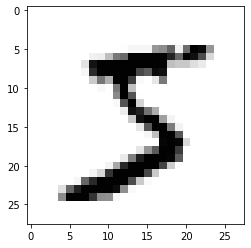

In [14]:
plt.imshow(x_train[0], cmap='Greys')

In [26]:
x_train_vec = x_train.reshape(60000, 28*28)
x_test_vec = x_test.reshape(10000, 28*28)

In [27]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

In [28]:
model = Sequential()
model.add(Dense(112, input_dim = 28*28, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
hist = model.fit(x_train_vec, y_train_oh, validation_split=0.2, epochs=30, batch_size=20)

Epoch 1/30
2400/2400 [==============================] - 3s 1ms/step - loss: 0.9985 - accuracy: 0.8101 - val_loss: 0.3097 - val_accuracy: 0.9218
Epoch 2/30
2400/2400 [==============================] - 2s 966us/step - loss: 0.2939 - accuracy: 0.9236 - val_loss: 0.3126 - val_accuracy: 0.9233
Epoch 3/30
2400/2400 [==============================] - 2s 998us/step - loss: 0.2164 - accuracy: 0.9417 - val_loss: 0.2116 - val_accuracy: 0.9472
Epoch 4/30
2400/2400 [==============================] - 2s 983us/step - loss: 0.1731 - accuracy: 0.9531 - val_loss: 0.1764 - val_accuracy: 0.9524
Epoch 5/30
2400/2400 [==============================] - 2s 994us/step - loss: 0.1389 - accuracy: 0.9618 - val_loss: 0.1666 - val_accuracy: 0.9563
Epoch 6/30
2400/2400 [==============================] - 2s 978us/step - loss: 0.1195 - accuracy: 0.9665 - val_loss: 0.1518 - val_accuracy: 0.9622
Epoch 7/30
2400/2400 [==============================] - 2s 964us/step - loss: 0.1070 - accuracy: 0.9709 - val_loss: 0.1463 - v

In [32]:
model.evaluate(x_test_vec, y_test_oh)

313/313 [==============================] - 0s 1ms/step - loss: 0.1952 - accuracy: 0.9729


[0.19516396522521973, 0.9728999733924866]

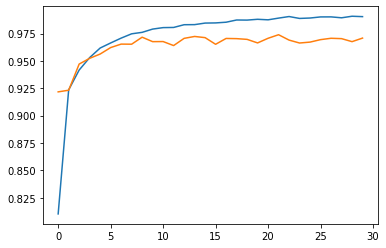

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [35]:
# - CNN

In [38]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [39]:
x_train_cov = x_train.reshape(60000, 28, 28, 1)
y_train_cov = x_test.reshape(10000, 28, 28, 1)

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               1179776   
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                      

In [49]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

In [47]:
hist = model.fit(x_train_cov, y_train_oh, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/30
2400/2400 [==============================] - 37s 15ms/step - loss: 0.2865 - accuracy: 0.9535 - val_loss: 0.0816 - val_accuracy: 0.9777
Epoch 2/30
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0611 - accuracy: 0.9816 - val_loss: 0.0842 - val_accuracy: 0.9777
Epoch 3/30
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.0823 - val_accuracy: 0.9811
Epoch 4/30
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0786 - val_accuracy: 0.9814
Epoch 5/30
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0824 - val_accuracy: 0.9829
Epoch 6/30
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.1100 - val_accuracy: 0.9797
Epoch 7/30
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0191 - accuracy: 0.9950 - val_loss: 0.1005 -